# Section 2.3 — Inventory of discrete distributions

This notebook contains all the code examples from [Section 2.3 Inventory of discrete distributions]() of the **No Bullshit Guide to Statistics**.


#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,5)},
)

%config InlineBackend.figure_format = 'retina'

# # silence annoying warnings
# import warnings; warnings.filterwarnings('ignore')

In [3]:
# set random seed for repeatability
np.random.seed(42)

In [4]:
# Download the `plot_helpers.py` module from the book's main github repo:
import os, requests
if not os.path.exists("plot_helpers.py"):
    resp = requests.get("https://raw.githubusercontent.com/minireference/noBSstatsnotebooks/main/notebooks/plot_helpers.py")
    with open("plot_helpers.py", "w") as f:
        f.write(resp.text)
    print("Downloaded `plot_helpers.py` module to current directory:", os.getcwd())
else:
    print("You already have plot_helpers.py, so we can proceed.")

from plot_helpers import ensure_containing_dir_exists
from plot_helpers import generate_pmf_panel
from plot_helpers import plot_pmf

You already have plot_helpers.py, so we can proceed.


## Definitions

## Math prerequisites

### Combinatorics

See SciPy docs:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.factorial.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.perm.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html


Gamma and Beta functions:
- https://docs.scipy.org/doc/scipy/reference/special.html#gamma-and-related-functions


#### Permutations

In [5]:
from scipy.special import perm

perm(5,1), perm(5,2), perm(5,3), perm(5,4), perm(5,5)

(5.0, 20.0, 60.0, 120.0, 120.0)

If you want to actually see, all the possible permutations we 
use the permutations function from `itertools`

In [6]:
from itertools import permutations

n = 5
k = 2
for perm in permutations(range(1,n+1), k):
    print(perm)

(1, 2)
(1, 3)
(1, 4)
(1, 5)
(2, 1)
(2, 3)
(2, 4)
(2, 5)
(3, 1)
(3, 2)
(3, 4)
(3, 5)
(4, 1)
(4, 2)
(4, 3)
(4, 5)
(5, 1)
(5, 2)
(5, 3)
(5, 4)


#### Combinations

In [7]:
from scipy.special import comb


comb(5,0), comb(5,1), comb(5,2), comb(5,3), comb(5,4), comb(5,5)

(1.0, 5.0, 10.0, 10.0, 5.0, 1.0)

In [8]:
from itertools import combinations

n = 5
k = 2
for comb in combinations(range(1,n+1), k):
    print(comb)

(1, 2)
(1, 3)
(1, 4)
(1, 5)
(2, 3)
(2, 4)
(2, 5)
(3, 4)
(3, 5)
(4, 5)


#### Factorial

In [9]:
from scipy.special import factorial

In [10]:
# ALT.
# from math import factorial

#### Gamma and Beta functions

In [11]:
from scipy.special import gamma as gammaf
from scipy.special import beta as betaf

### Summations



## Discrete distributions reference

### Discrete uniform

In [12]:
# import the model family
from scipy.stats import randint

# choose parameters
alpha = 1  # start at
beta = 4   # stop at

# create the rv object
rvU = randint(alpha, beta+1)

# use one of the rv object's methods
rvU.support()

(1, 4)

In [13]:
# generate random number
rvU.rvs()

3

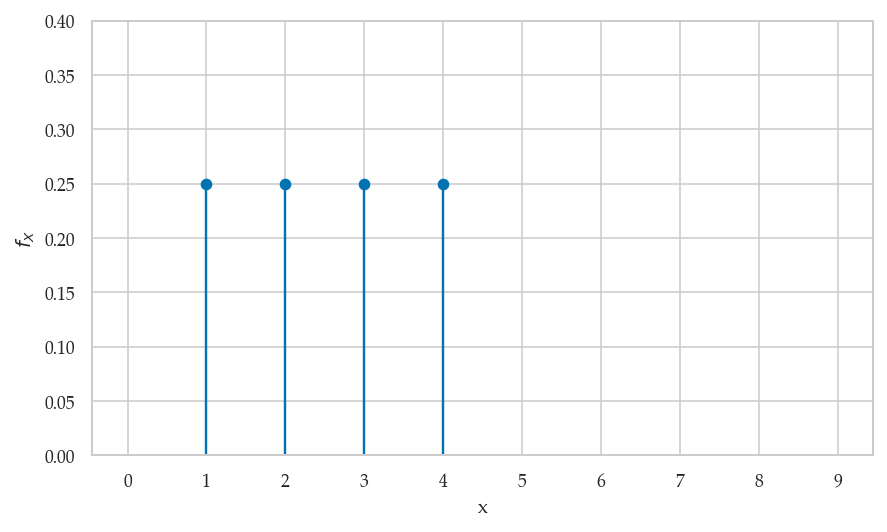

In [14]:
_ = plot_pmf(rvU, xlims=[0,10], ylims=[0,0.4])

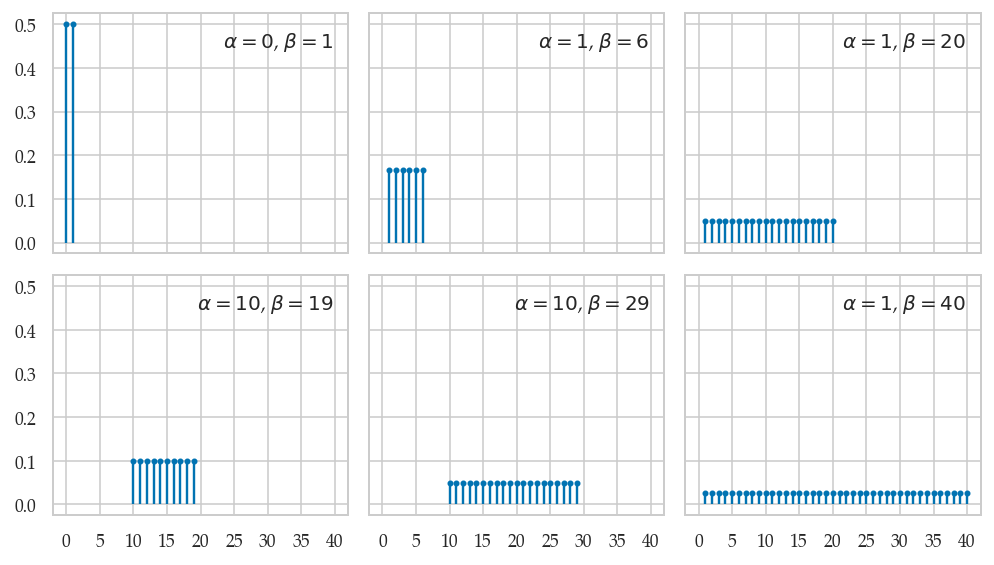

In [15]:
from scipy.stats import randint

kmax = 41
ks = np.arange(0, kmax)
kticks = 5

# parameter dicts (list of lists)
params_matrix = [
    [dict(low=0,high=1+1),    dict(low=1,high=6+1),    dict(low=1,high=20+1)],
    [dict(low=10,high=19+1),  dict(low=10,high=29+1),  dict(low=1,high=40+1)],
]

params_to_latex = {
    "low": "\\alpha",
    "high": "\\beta",
}

_ = generate_pmf_panel("figures/prob/probpanels/randint_panel.pdf",
                       ks, randint, params_matrix,
                       params_to_latex=params_to_latex,
                       kticks=kticks)


### Bernoulli

In [16]:
from scipy.stats import bernoulli

rvB = bernoulli(p=0.3)
rvB.support()

(0, 1)

In [17]:
rvB.rvs(10)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

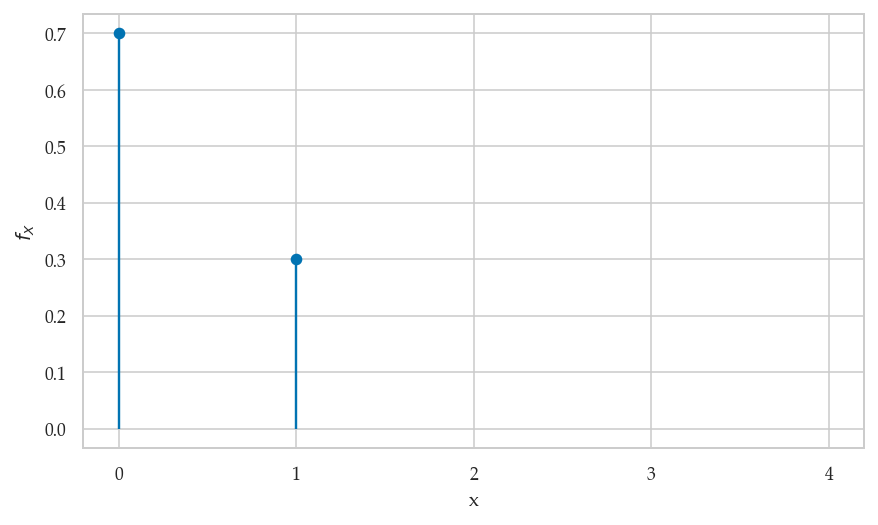

In [18]:
_ = plot_pmf(rvB, xlims=[0,5])

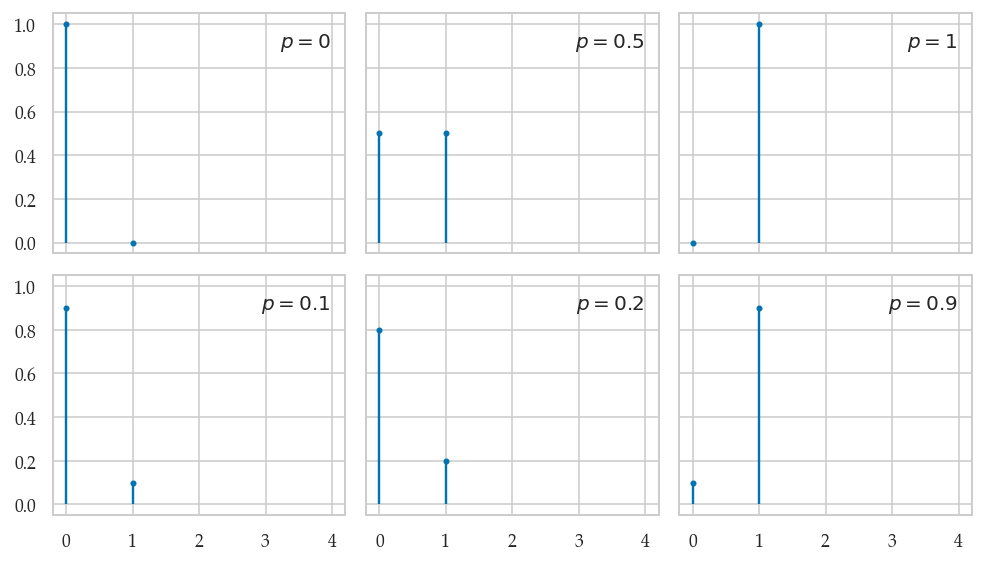

In [19]:
from scipy.stats import bernoulli

kmax = 5
ks = np.arange(0, kmax)
kticks = 1

# parameter dicts (list of lists)
params_matrix = [
    [dict(p=0),  dict(p=0.5),  dict(p=1)],
    [dict(p=0.1),  dict(p=0.2),  dict(p=0.9)],
]

params_to_latex = {
}

_ = generate_pmf_panel("figures/prob/probpanels/bernoulli_panel.pdf",
                   ks, bernoulli, params_matrix,
                   params_to_latex=params_to_latex,
                   kticks=kticks)

### Poisson


In [20]:
from scipy.stats import poisson
lam = 10
rvP = poisson(lam)

In [21]:
rvP.pmf(8)

0.11259903214902009

In [22]:
rvP.cdf(8)

0.3328196787507191

In [23]:
## ALT. way to compute the value F_P(8) =
# sum([rvP.pmf(x) for x in range(0,8+1)])

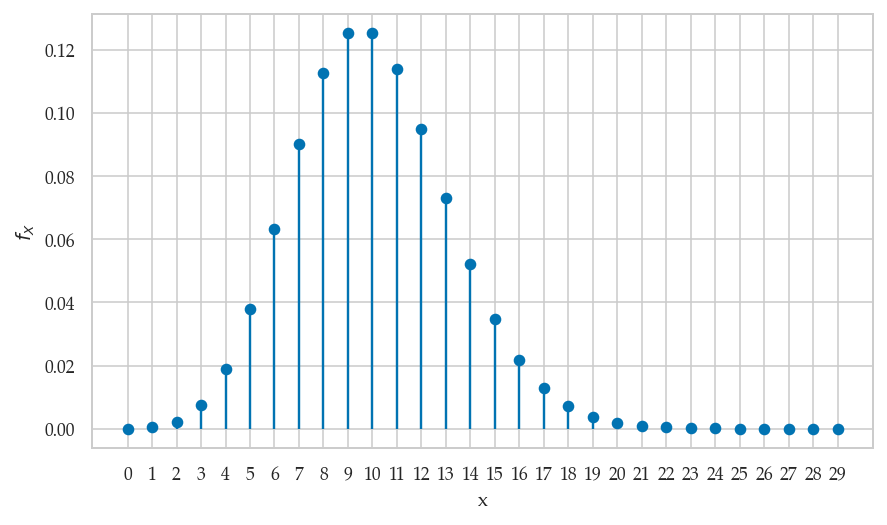

In [24]:
_ = plot_pmf(rvP, xlims=[0,30])

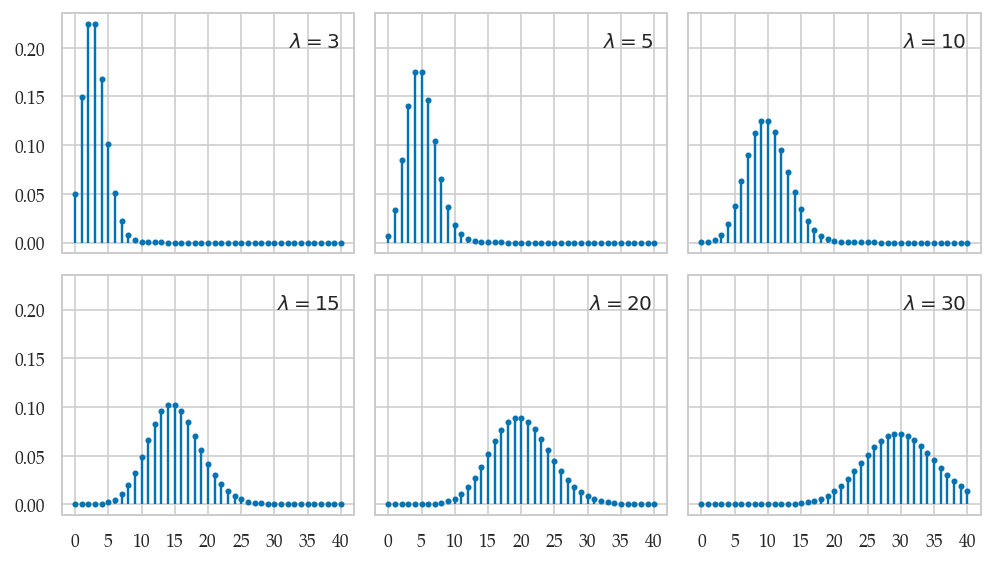

In [25]:
from scipy.stats import poisson

kmax = 41
ks = np.arange(0, kmax)
kticks = 5


# parameter dicts (list of lists)
params_matrix = [
    [dict(mu=3),  dict(mu=5),  dict(mu=10)],
    [dict(mu=15), dict(mu=20), dict(mu=30)]
]

params_to_latex = {
    'mu': '\\lambda'
}

_ = generate_pmf_panel("figures/prob/probpanels/poisson_panel.pdf",
                       ks, poisson, params_matrix,
                       params_to_latex=params_to_latex,
                       kticks=kticks)


### Binomial

In [26]:
from scipy.stats import binom

n = 40
p = 0.14
rvX = binom(n,p)


In [27]:
rvX.support()

(0, 40)

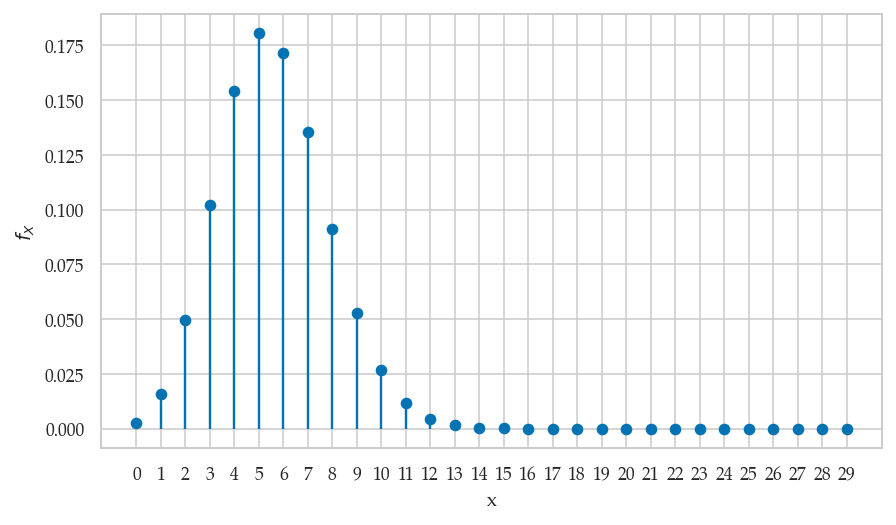

In [28]:
_ = plot_pmf(rvX, xlims=[0,30])

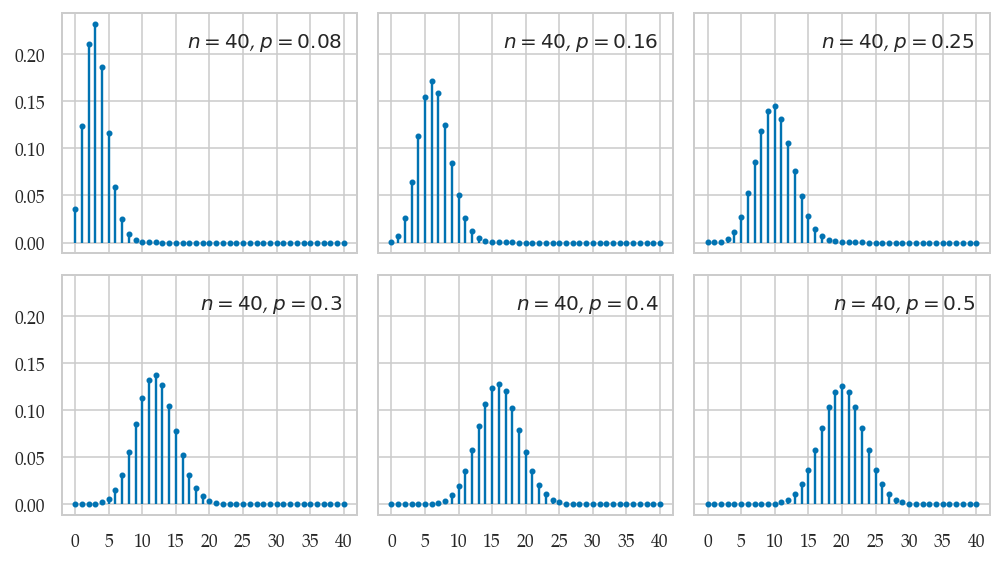

In [29]:
from scipy.stats import binom

kmax = 40
ks = np.arange(0, kmax+1)
kticks = 5

# parameter dicts (list of lists)
params_matrix = [
    [ dict(n=kmax, p=0.08),  dict(n=kmax, p=0.16),  dict(n=kmax, p=0.25) ],
    [ dict(n=kmax, p=0.3),   dict(n=kmax, p=0.4),   dict(n=kmax, p=0.5)  ],
]

_ = generate_pmf_panel("figures/prob/probpanels/binomial_panel.pdf",
                       ks, binom, params_matrix,
                       kticks=kticks,
                       fontsize=10)

### Geometric

In [30]:
from scipy.stats import geom

p = 0.2
rvG = geom(p)

In [31]:
rvG.support()

(1, inf)

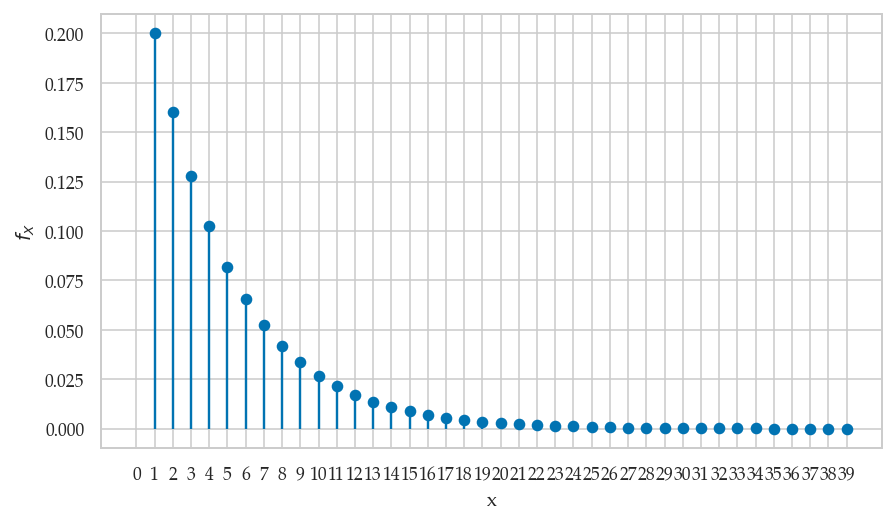

In [32]:
_ = plot_pmf(rvG, xlims=[0,40])

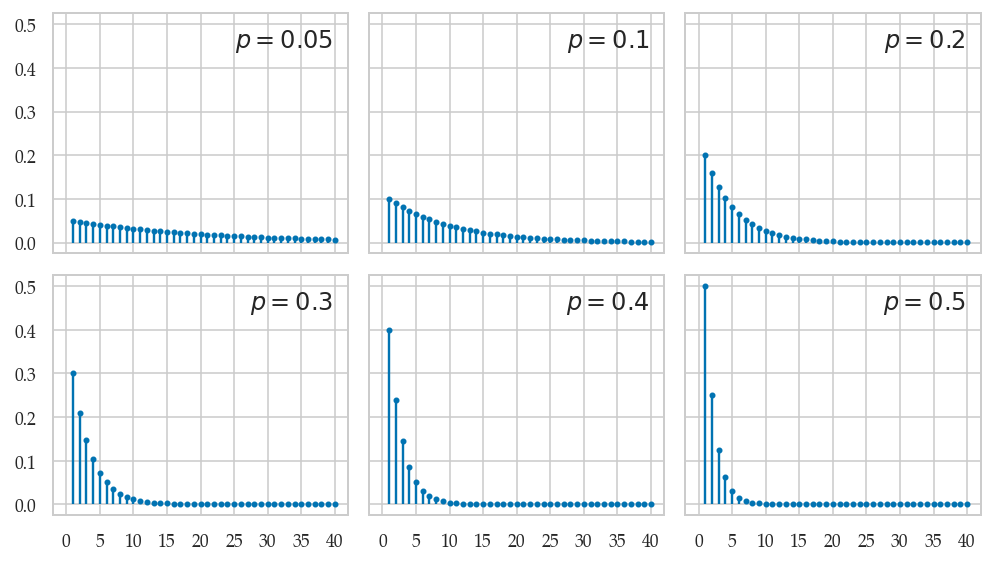

In [33]:
from scipy.stats import geom

kmax = 40
ks = np.arange(0, kmax+1)
kticks = 5

# parameter dicts (list of lists)
params_matrix = [
    [ dict(p=0.05),  dict(p=0.1),  dict(p=0.2) ],
    [ dict(p=0.3),   dict(p=0.4),  dict(p=0.5) ],
]

_ = generate_pmf_panel("figures/prob/probpanels/geometric_panel.pdf",
                       ks, geom, params_matrix,
                       kticks=kticks,
                       fontsize=12)

### Negative binomial

In [34]:
from scipy.stats import nbinom

n = 10
p = 0.6

rvN = nbinom(n,p)


In [35]:
rvN.support()

(0, inf)

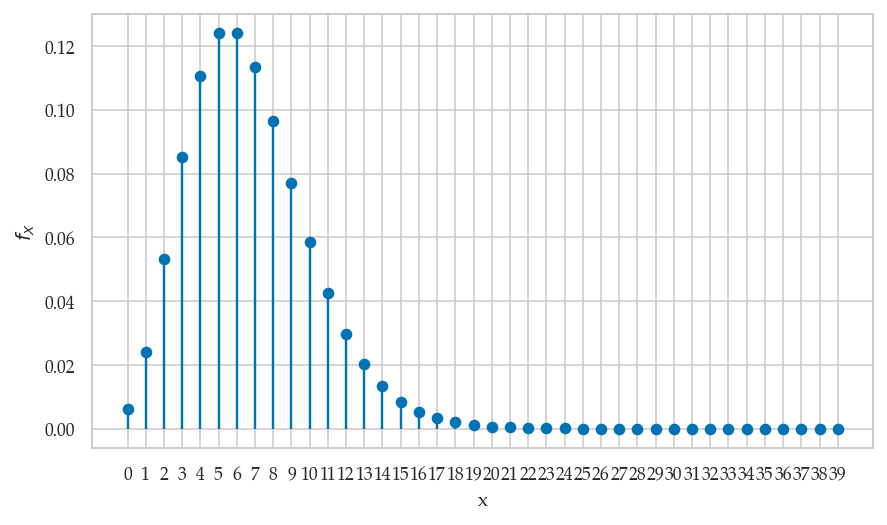

In [36]:
_ = plot_pmf(rvN, xlims=[0,40])

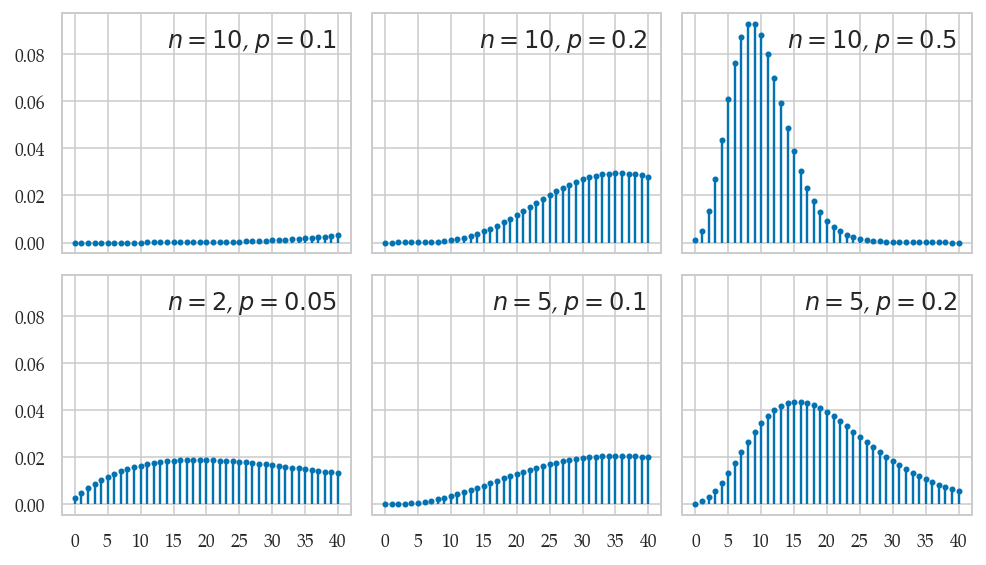

In [37]:
from scipy.stats import nbinom

kmax = 40
ks = np.arange(0, kmax+1)
kticks = 5

# parameter dicts (list of lists)
params_matrix = [
    [ dict(n=10, p=0.1),  dict(n=10, p=0.2),  dict(n=10,p=0.5) ],
    [ dict(n=2,  p=0.05), dict(n=5,  p=0.1),  dict(n=5, p=0.2) ],
]

params_to_latex = {}

_ = generate_pmf_panel("figures/prob/probpanels/nbinom_panel.pdf",
                       ks, nbinom, params_matrix,
                       kticks=kticks,
                       params_to_latex=params_to_latex,
                       fontsize=12)

### Hypergeometric

In [38]:
from scipy.stats import hypergeom

a = 30   # number of success balls
b = 40   # number of failure balls
n = 20   # how many we're drawing

rvH = hypergeom(a+b, a, n)
# - arg1 = `internal M` = the total number of objects   == a+b
# - arg2 = `internal n` = number of success objects     == a 
# - arg3 = `internal N` = number of draws               == n

rvH.support()

(0, 20)

In [39]:
meanH, stdH = rvH.stats()
print("mean =", meanH, "  std =", stdH)

mean = 8.571428571428571   std = 3.54924578527063


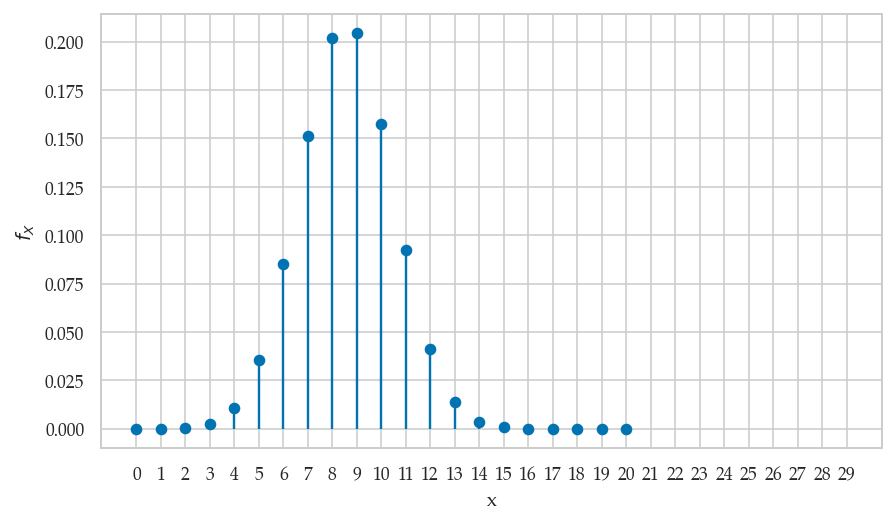

In [40]:
_ = plot_pmf(rvH, xlims=[0,30])

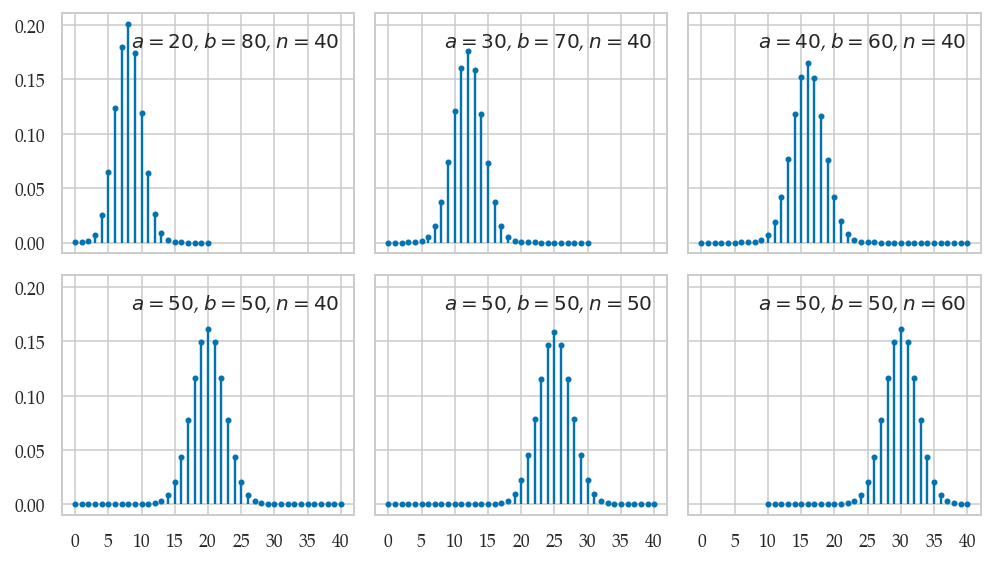

In [41]:
from scipy.stats import hypergeom

kmax = 40
ks = np.arange(0, kmax+1)
kticks = 5

# parameter dicts (list of lists)
params_matrix = [
    [ dict(M=100,n=20,N=40), dict(M=100,n=30,N=40), dict(M=100,n=40,N=40) ],
    [ dict(M=100,n=50,N=40), dict(M=100,n=50,N=50), dict(M=100,n=50,N=60) ],
]

params_to_latex = {}

_ = generate_pmf_panel("figures/prob/probpanels/hypergeom_panel.pdf",
                       ks, hypergeom, params_matrix,
                       kticks=kticks,
                       params_to_latex=params_to_latex,
                       fontsize=10)

##### Tomatoes salad probabilities

(0.28571428571428575, 0.5714285714285715, 0.14285714285714288)

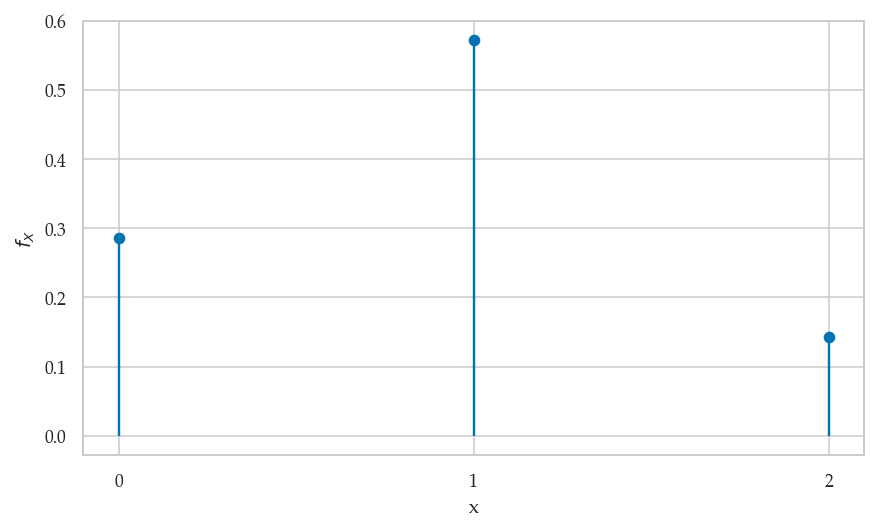

In [42]:
a = 3   # number of good tomatoes
b = 4   # number of rotten tomatoes
n = 2   # how many we're drawing

rvHe = hypergeom(a+b, a, n)


_ = plot_pmf(rvHe, xlims=[0,3])

rvHe.pmf(0), rvHe.pmf(1), rvHe.pmf(2)

##### Number of dogs seen by Amy

In [43]:
a = 7        # number dogs
b = 20 - 7   # number of other animals
n = 12       # how many "patients" Amy will see today

rvD = hypergeom(a+b, a, n)

# Pr of exactly five dogs
rvD.pmf(5)

0.2860681114551084

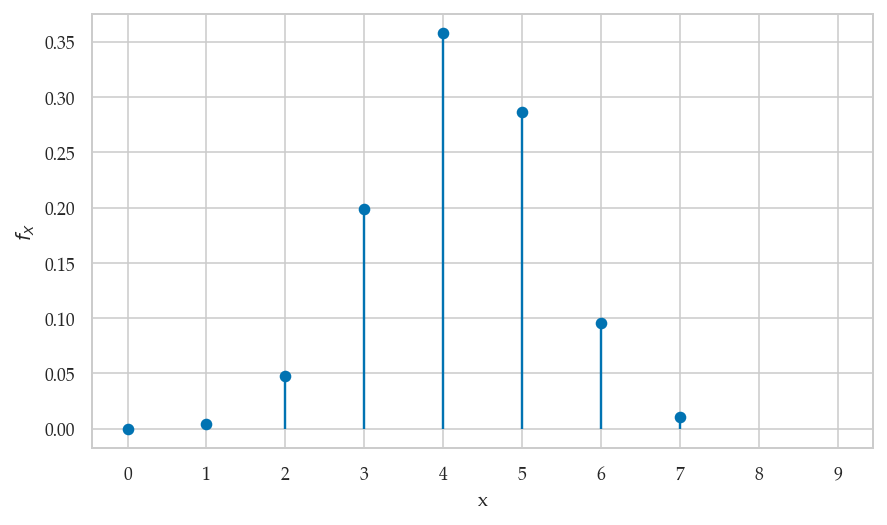

In [44]:
_ = plot_pmf(rvD, xlims=[0,10])

### Multinomial

See [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html).

In [45]:
from scipy.stats import multinomial

n = 10
ps = [0.1, 0.5, 0.8]

rvM = multinomial(n,ps)

In [46]:
rvM.rvs()

array([[0, 5, 5]])

In [47]:
# TODO: 3D scatter plot of points in space

## Modelling real-world data using probability

## Discussion